### IMDB Movie Reviews Sentiment Classification

#### Solution workflow: -

* Extract train & test sentences containing 'max_features' most frequent tokens from Keras in-built IMDB dataset (tokens are Positional Index into its vocabulary)... all infrequent tokens are represented by some constant.

* Trim/pad sentences to 'sent_max_len' words (same as LSTM input's timesteps param and also the LSTM 'units') https://stackoverflow.com/questions/44273249/in-keras-what-exactly-am-i-configuring-when-i-create-a-stateful-lstm-layer-wi

* Define Supervised ML network
    * Embedding represents each token as 'word_vec_len' x 1 Word Vector... Not sure what pre-trained embedding does Keras+IMDB deriving??
    * LSTM many-to-one takes in batch of sentence, i.e., batch_size x sent_max_len x word_vec_len
    * Binary Sigmoid layer for binary classification

* Fit model with train & validate (same as test) labeled sentences

* Evaluate accuracy with test sentences


#### Compare accuracy for different run options

* LSTM, 10 epochs: Validation accuracy actually fluctuates b/w 0.83 & 0.85
* Bi-di LSTM, 10 epochs: Almost same accuracy range as with just LSTM


#### Extending this base solution further: - 

* Split train into train & valid for better generalized model learning

* Multi label classification

* Use either of the RNN, LSTM or GRU

* Use explicit Embeddings matrix - either existing pre-trained embeddings (Word2Vec, GloVe, etc) or train your own Embeddings with given text corpus using Gensim

* Use forward directional LSTM or bi-directional LSTM. Bi-directional is better, e.g., meaning of Teddy in “He said, Teddy bears are on sale” -vs- “He said, Teddy Roosevelt was a great President”

* Use STATEFUL LSTM for seq-2-seq use cases (speech synthesis, machine translation, Q&A) - http://philipperemy.github.io/keras-stateful-lstm/ 


#### Reference: -
This solution is adapted from reference example https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py 


In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM, Bidirectional

from keras.datasets import imdb

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Most frequent tokens, i.e., vocab size
max_features = 5000

# Words / tokens count in Sentence which is also the LSTM input's timesteps param
sent_max_len = 100

# Batches of setences to feed into neural net
batch_size = 32

# Word vector length, i.e., dimension of the dense embedding
word_vec_len = 64

# LSTM output size assuming we are using many as output which will be ultimately connected to dense layer to match up the label classes
lstm_out_size = 64

# NN training epochs
n_epochs = 1

In [3]:
print('Loading data...')

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [4]:
mylen = np.vectorize(len)
print(mylen(x_train).min(), mylen(x_train).max())

11 2494


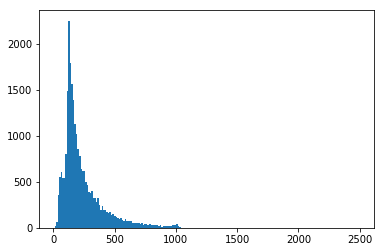

In [5]:
plt.hist(mylen(x_train), 200)
plt.show()

In [6]:
# Trim long sentences or pad short ones
# What is the implication of trimming lonnng setences to max_len

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=sent_max_len)
x_test = sequence.pad_sequences(x_test, maxlen=sent_max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)


In [7]:
x_train[0]

array([1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,   14,
        407,   16,   82,    2,    8,    4,  107,  117,    2,   15,  256,
          4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,   88,
          4,  381,   15,  297,   98,   32, 2071,   56,   26,  141,    6,
        194,    2,   18,    4,  226,   22,   21,  134,  476,   26,  480,
          5,  144,   30,    2,   18,   51,   36,   28,  224,   92,   25,
        104,    4,  226,   65,   16,   38, 1334,   88,   12,   16,  283,
          5,   16, 4472,  113,  103,   32,   15,   16,    2,   19,  178,
         32])

In [8]:
#'''
print('Build LSTM based network...')

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=word_vec_len))
model.add(LSTM(units=lstm_out_size, input_shape=(sent_max_len, word_vec_len), dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())
#'''

Build LSTM based network...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 353,089
Trainable params: 353,089
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
'''
print('Build bi-directional LSTM based network model...')

model = Sequential()

# input_length=sent_max_len
model.add(Embedding(input_dim=max_features, output_dim=word_vec_len))
model.add(Bidirectional(LSTM(units=lstm_out_size)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())
'''

"\nprint('Build bi-directional LSTM based network model...')\n\nmodel = Sequential()\n\n# input_length=sent_max_len\nmodel.add(Embedding(input_dim=max_features, output_dim=word_vec_len))\nmodel.add(Bidirectional(LSTM(units=lstm_out_size)))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(1, activation='sigmoid'))\n\nprint(model.summary())\n"

In [10]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          validation_data=(x_test, y_test))

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 106s 4ms/step - loss: 0.4714 - acc: 0.7738 - val_loss: 0.4245 - val_acc: 0.8109


In [11]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 13s 511us/step
Test score: 0.42448286710739136
Test accuracy: 0.81088
